In [49]:
import matplotlib.pyplot as plt

In [50]:
import pandas as pd

In [51]:
import numpy as np

In [77]:
df = pd.read_csv('plot_15cities.tsv', sep='\t')

In [78]:
df.head()

,US City,CitationCount,Longitude,Latitude
0,"Phoenix, AZ",15,-112.072754,33.44277
1,"New Orleans, LA",35,-90.077750,29.95370
2,"New York, NY",150,-74.007120,40.71455
3,"Honolulu, Hawaii",17,-157.857758,21.30485
4,"San Diego, CA",150,-117.162500,32.71500


In [79]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [80]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 2
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

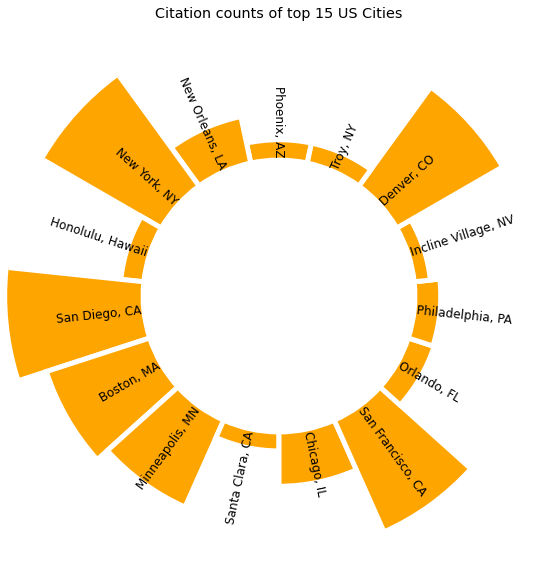

In [90]:
# Basic circular barplot with labels
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["CitationCount"].values
LABELS = df["US City"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2*np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
plt.rcParams.update({'font.size': 12})
plt.title('Citation counts of top 15 US Cities')
title_font_family="Bradley Hand",
title_font_size=30

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=5,
    color="orange", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)
fig.savefig('circular_barplot.jpg', dpi=200)

In [54]:
# set figure size
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

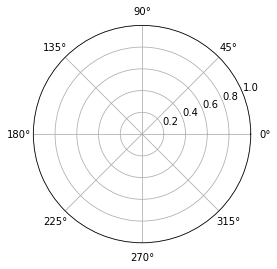

In [55]:
# plot polar axis
ax = plt.subplot(111, polar=True)

(0.0, 1.0, 0.0, 1.0)

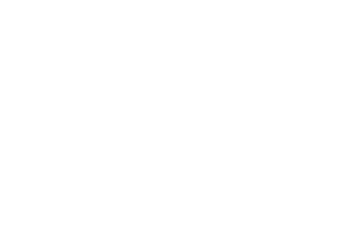

In [56]:
# remove grid
plt.axis('off')

In [57]:
# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

In [58]:
# Compute max and min in the dataset
max = df['CitationCount'].max()

In [59]:
# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.CitationCount + lowerLimit

In [60]:
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

In [61]:
# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

[0.41887902047863906,
 0.8377580409572781,
 1.2566370614359172,
 1.6755160819145563,
 2.0943951023931953,
 2.5132741228718345,
 2.9321531433504733,
 3.3510321638291125,
 3.7699111843077517,
 4.1887902047863905,
 4.607669225265029,
 5.026548245743669,
 5.445427266222308,
 5.864306286700947,
 6.283185307179586]

In [62]:
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

(0.0, 6.283185307179586, 0.0, 1.0)

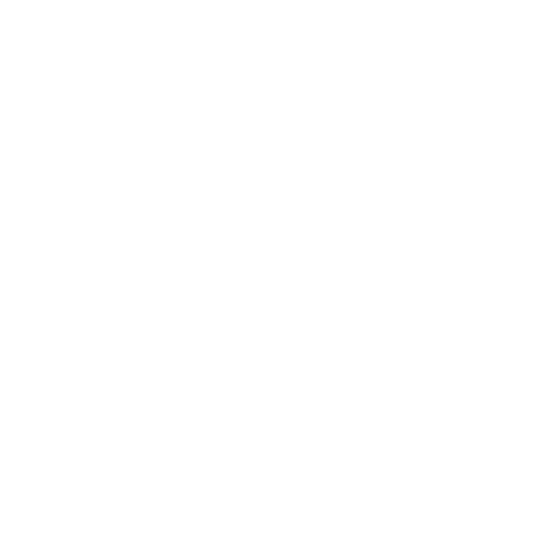

In [63]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

In [64]:
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

In [65]:
# little space between the bar and the label
labelPadding = 4

In [66]:
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["US City"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 